In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("USA_Housing.csv")
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

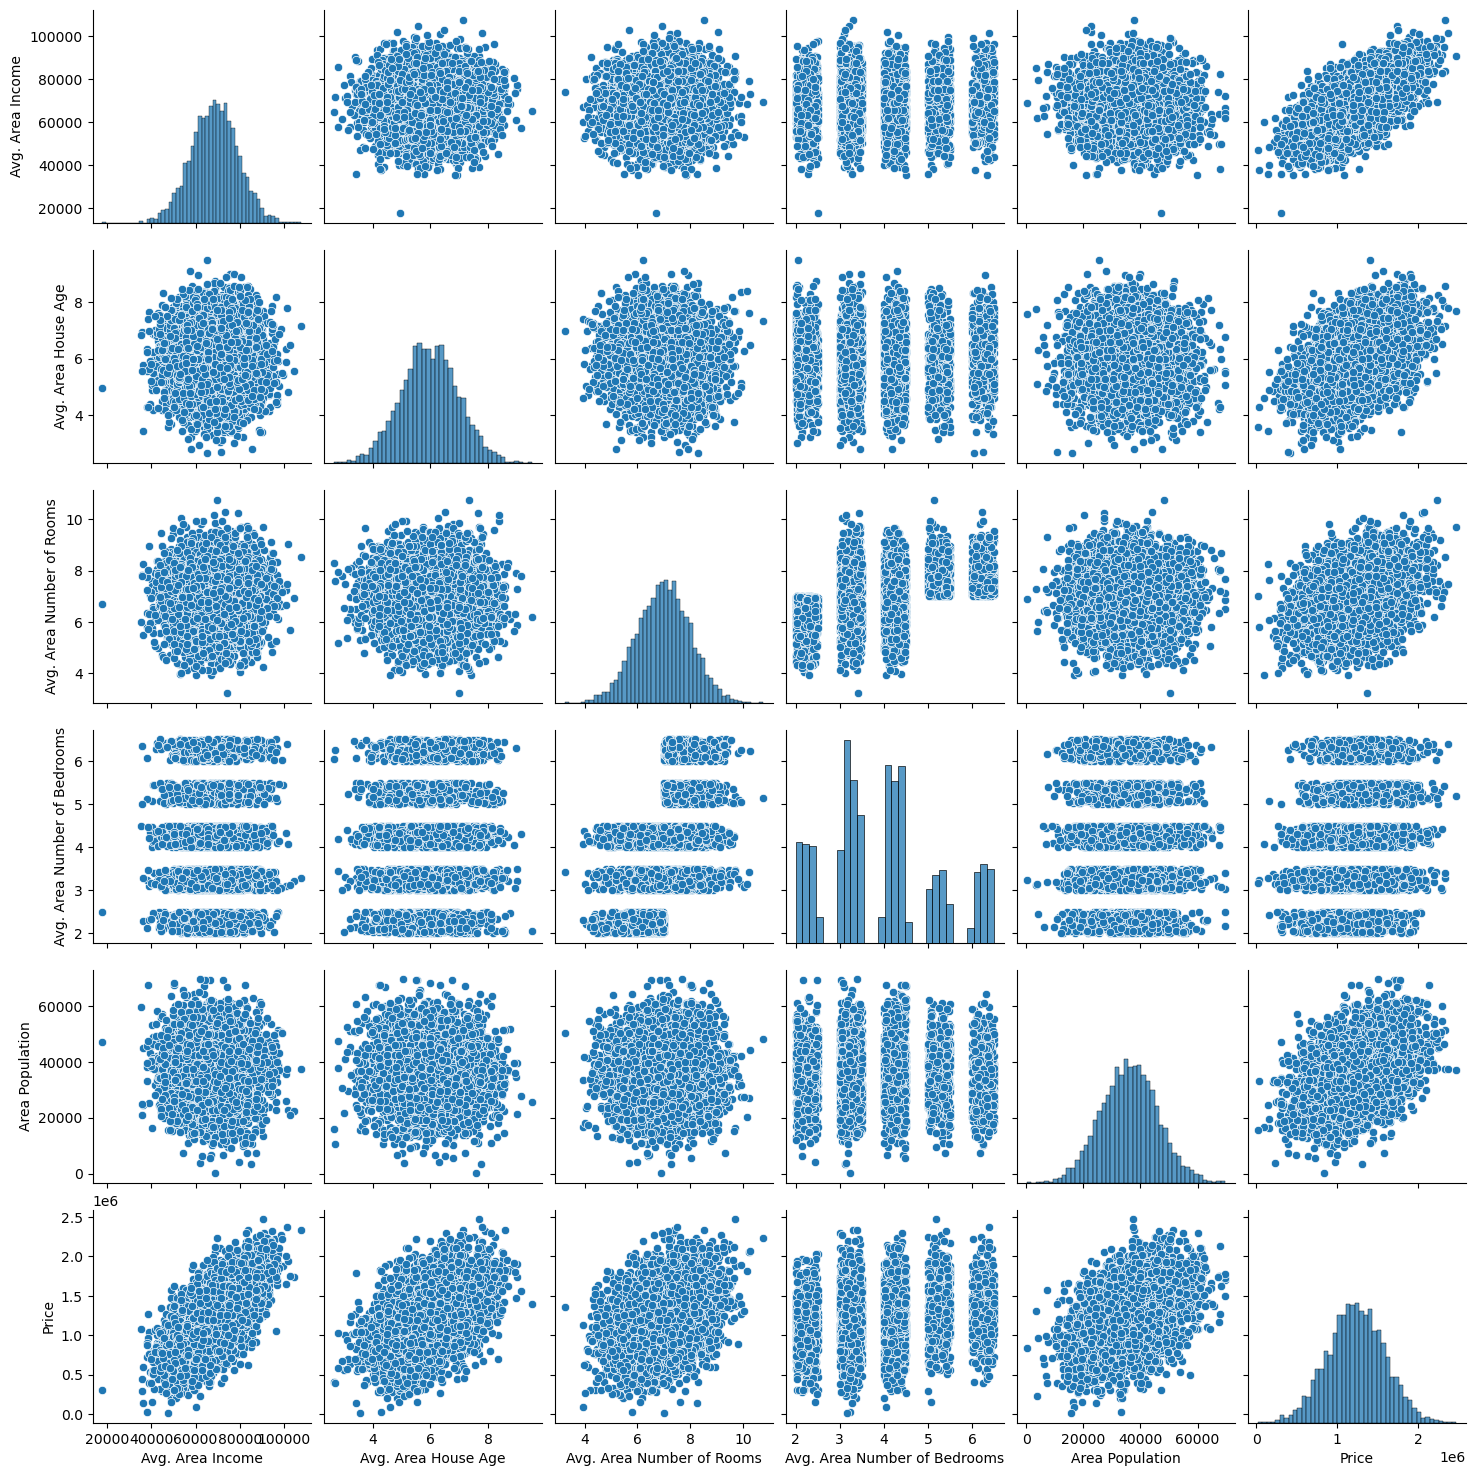

In [5]:
sns.pairplot(df)

In [6]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y = df['Price']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [8]:
lm1 = LinearRegression()
lm1.fit(x_train,y_train)


LinearRegression()

In [9]:
print(lm1.score(x_test,y_test))
print(lm1.intercept_)
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

0.9180160326194865
-2638723.4372315025


Coefficient
Avg. Area Income                  21.330199
Avg. Area House Age           167859.416282
Avg. Area Number of Rooms     121371.865124
Avg. Area Number of Bedrooms    1344.745518
Area Population                   15.226377

In [10]:
prediction = lm1.predict(x_test)
print(prediction)

[1005852.23991147 1622070.86238474 1289869.61281675 ... 1187037.51595317
  920121.87481888 1553316.44408099]


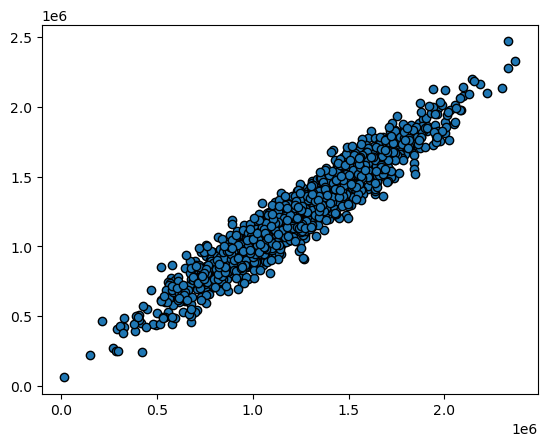

In [11]:

plt.scatter(y_test,prediction,edgecolor='black')

In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 83370.70165132171
MSE: 10709098667.75808
RMSE: 103484.77505294235


C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_12704\3014017539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))


<Axes: xlabel='Price', ylabel='Density'>

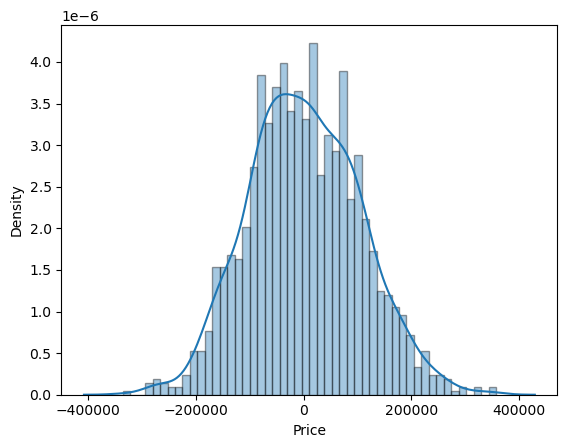

In [13]:

sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))

In [14]:
import pickle

In [15]:
with open('model03.pkl','wb') as file:
    pickle.dump(lm1,file)